## **Загрузка**

In [ ]:
pip install word2number

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from word2number import w2n

# Визуализация
import matplotlib.pyplot as plt

# Машинное обучение
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/CSV

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/CSV


In [ ]:
data = pd.read_csv('ParisHousing.csv', usecols=range(1,18))

In [ ]:
data.info(null_counts =1) 
print('\nКоличество повторяющихся строк —', data.duplicated().sum())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  object 
 2   floors             10000 non-null  int64  
 3   cityCode           10000 non-null  int64  
 4   cityPartRange      10000 non-null  int64  
 5   numPrevOwners      10000 non-null  int64  
 6   made               10000 non-null  int64  
 7   isNewBuilt         10000 non-null  bool   
 8   hasStormProtector  10000 non-null  bool   
 9   basement           10000 non-null  int64  
 10  attic              10000 non-null  int64  
 11  garage             10000 non-null  int64  
 12  hasStorageRoom     10000 non-null  bool   
 13  hasGuestRoom       10000 non-null  int64  
 14  price              10000 non-null  float64
 15  category           10000 non-null  object 
 16  PoolAndYard        1000

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


Нужно перевести строковые переменные в числовые:
* numberOfRooms
* isNewBuilt
* category
* PoolAndYard
* hasStorageRoom	
* hasStormProtector





# **Предобработка**

In [ ]:
for column in ('isNewBuilt', 'hasStorageRoom', 'hasStormProtector'):
  data[column] = data[column].astype(int)

In [ ]:
for column in ('category', 'PoolAndYard'):
   print(column, '—', data[column].unique())

category — ['Basic' 'Luxury']
PoolAndYard — ['has pool and no yard' 'has pool and has yard' 'no pool and no yard'
 'no pool and has yard']


In [ ]:
data['category'] = data['category'].map({'Luxury':1, 'Basic':0})
data = data.rename(columns={'category':'isLuxury'})

In [ ]:
data['PoolAndYard'] = data['PoolAndYard'].map({'has pool and no yard':10, 'has pool and has yard':11, 'no pool and no yard':0, 'no pool and has yard':1})

In [ ]:
data['numberOfRooms'] = data['numberOfRooms'].apply(w2n.word_to_num)

In [ ]:
data.info(null_counts =1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   floors             10000 non-null  int64  
 3   cityCode           10000 non-null  int64  
 4   cityPartRange      10000 non-null  int64  
 5   numPrevOwners      10000 non-null  int64  
 6   made               10000 non-null  int64  
 7   isNewBuilt         10000 non-null  int64  
 8   hasStormProtector  10000 non-null  int64  
 9   basement           10000 non-null  int64  
 10  attic              10000 non-null  int64  
 11  garage             10000 non-null  int64  
 12  hasStorageRoom     10000 non-null  int64  
 13  hasGuestRoom       10000 non-null  int64  
 14  price              10000 non-null  float64
 15  isLuxury           10000 non-null  int64  
 16  PoolAndYard        1000

# **Расчёты**

In [ ]:
X_std = StandardScaler().fit_transform(data)

In [ ]:
SSE = []
for k in range(20, 200, 20):
   estimator = KMeans (n_clusters = k)   
   estimator.fit(X_std)   
   SSE.append(estimator.inertia_)   
X = range(20, 200, 20)

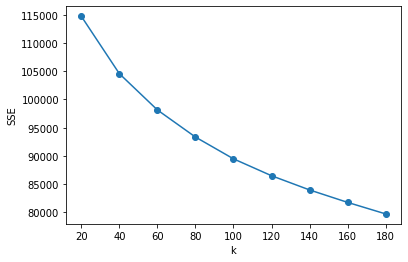

In [ ]:
plt.xlabel('k') 
plt.ylabel('SSE') 
plt.plot(X,SSE,'o-');

**ВЫВОД**: оптимальное число кластеров — 40 или 20.